# Linear Regression Visualization

<a target="_blank" href="https://colab.research.google.com/github/djlouie/Linear-Regression-Visualization/blob/main/LinearRegressionSCAI.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 1. Lets Say We Have Some Data

In this case we have some synthetic data where hypothetically the x-axis represents the amount of rain and the y-axis represents the number of banana slugs seen.

In [1]:
x_coords = [0.1, 0.3, 0.6, 0.8, 1]
y_coords = [0.2, 0.45, 0.60, 0.625, 0.75]

Plotting this data with `matplotlib` we can see a general positive trend, which makes sense because banana slugs like to come out of the ground when the soil is wet.

In [2]:
import matplotlib.pyplot as plt

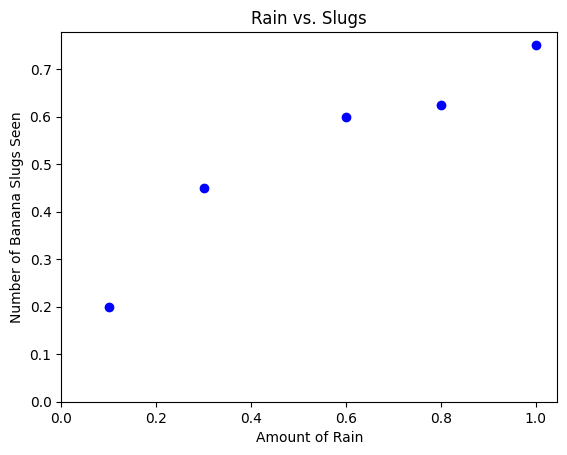

In [3]:
plt.scatter(x_coords, y_coords, marker='o', color='b')
plt.xlabel('Amount of Rain')
plt.ylabel('Number of Banana Slugs Seen')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Rain vs. Slugs')
plt.show()

## 2. Prediciting an Output from Features
Lets say we wanted to predict the *number of banana slugs* given a certain *amount of rain*. Thern we would call the *amount of rain* a *feature* and the *number of banana slugs* we predict a *predicted output*. One way to do that is to manually fit a line, $y = mx + b$, to the data we have already *observed* by experimenting with different $y-intercepts/b$ and $slopes/m$, such as below.

In [4]:
import numpy as np

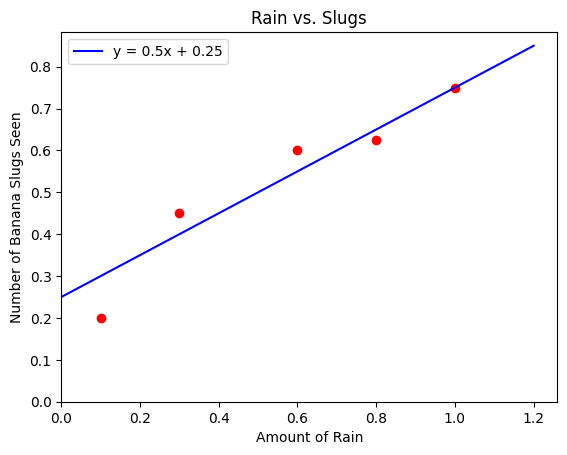

In [5]:
# plot data points
plt.scatter(x_coords, y_coords, marker='o', color='r')

# plot line
x_eq = np.linspace(0, 1.2, 100)
y_eq = 0.5*x_eq + 0.25  # y = mx + b
plt.plot(x_eq, y_eq, label='y = 0.5x + 0.25', color='b')

# labels
plt.xlabel('Amount of Rain')
plt.ylabel('Number of Banana Slugs Seen')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Rain vs. Slugs')
plt.legend()
plt.show()

A line is plotted with the equation $y = mx + b$, that means once we have plotted the line manuallly to get our *predicted output* we simply input any input $x$ into the equation $y = mx + b$ that we have fitted to out data.

To sereate out our *observed output* and our *predicted output* we will often represent *observed output* with $y$ and *predicted output* with $\hat{y}$. So our line, which we call a *model* is represented by the equation $\hat{y} = mx + b$.

## 3. Machine Learning vs. Traditional programming
In ML the model learns and infers rules from the data, we do not program specific rules ourselves!

That means when we manually programmed the line above that was not machine learning! Instead, we want our computer to learn the *parameters*, $m$ and $b$ on its own!


![](https://raw.githubusercontent.com/djlouie/Linear-Regression-Visualization/main/images/Trad_Prog_Vs_ML.png)

## 4. What things do we need for the computer to learn on its own?
Think about it, then open the cell to get the answer.


### Answers:
1. A measurement to determine how wrong the line is!
2. A method to minimize how wrong the line is!

# 5. Residual

Below is a plot of a line with a $slope$ of 1 and a $y-intercept$ of 0.

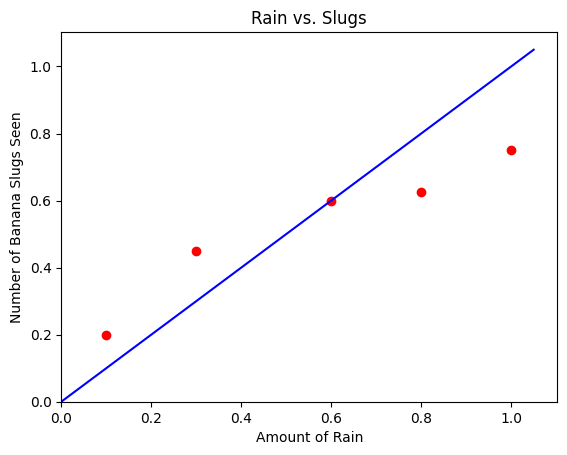

In [6]:
# plot data points
plt.scatter(x_coords, y_coords, marker='o', color='r')

# plot line
x_eq = np.linspace(0, 1.05, 100)
y_eq = 1*x_eq + 0
plt.plot(x_eq, y_eq, color='b')

# labels
plt.xlabel('Amount of Rain')
plt.ylabel('Number of Banana Slugs Seen')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Rain vs. Slugs')
plt.show()

## 5.1 How do we determine how wrong the the line is?

For a specefic observed point we can calculate the *residual* which is represented by:
$$Residual = Observed - Predicted$$
or
$$Residual = y - \hat{y}$$

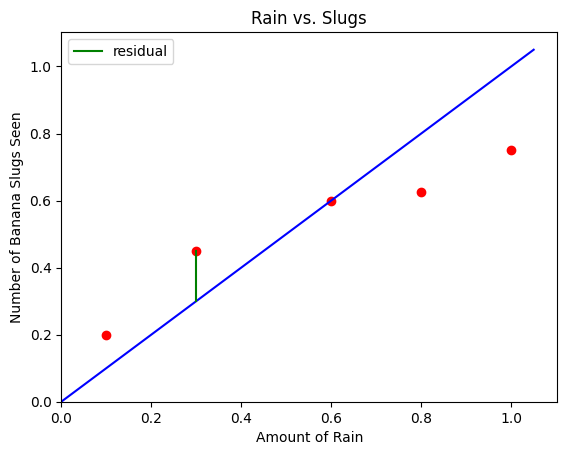

In [7]:
# plot line
m = 1  # slope
b = 0  # y-intercept
x_eq = np.linspace(0, 1.05, 100)
y_eq = m*x_eq + b
plt.plot(x_eq, y_eq, color='b')

# plot residual
plt.plot([x_coords[1], x_coords[1]],
    [y_coords[1], m*x_coords[1]+b], color='g', label = 'residual')

# plot data points
plt.scatter(x_coords, y_coords, marker='o', color='r')

# labels
plt.xlabel('Amount of Rain')
plt.ylabel('Number of Banana Slugs Seen')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.title('Rain vs. Slugs')
plt.show()

The residual for the second point is represented by the green line above, lets calculate it:

In [8]:
residual = y_coords[1] - m*x_coords[1]+b
print('Observed:', y_coords[1])
print('Predicted:', m*x_coords[1]+b)
print('Residual:', residual)

Observed: 0.45
Predicted: 0.3
Residual: 0.15000000000000002


## 6. Sum of Squared Residuals

To calculate how "wrong" the line is for a single point we can calculate the *residual*, we can also call this meassure of devaition the *Error*. However, how should we calculate how "wrong" the line is for all of the points?

---

If we simply added all the residuals, the residuals above and below the line would cancel out. So, to account for that we can simply square the residuals before adding them up. This has the added benefit that says the line is more "wrong" the larger the residual is because its squared. We call this the *sum of squared residuals*:

---
$$SSR = (Observed_1 - Predicted_1) ^2 + (Observed_1 - Predicted_1) ^2 + \cdots$$
or
$$SSR = \sum_{i=1}^{n} (Observed_i - Predicted_i) ^2$$

---
In machine learning we call the function that measures how "wrong" the line is the *Loss*.


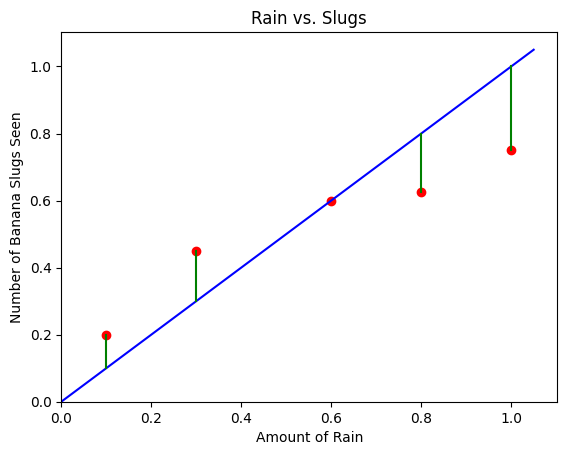

In [9]:
# plot line
m = 1
b = 0
x_eq = np.linspace(0, 1.05, 100)
y_eq = m*x_eq + b
plt.plot(x_eq, y_eq, color='b')

# plot residual
for i in range(len(x_coords)):
    plt.plot([x_coords[i], x_coords[i]],
        [y_coords[i], m*x_coords[i]+b], color='g')

# plot data points
plt.scatter(x_coords, y_coords, marker='o', color='r')

# labels
plt.xlabel('Amount of Rain')
plt.ylabel('Number of Banana Slugs Seen')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Rain vs. Slugs')
plt.show()

## 6.1 Lets create a class version of the model
1. Making a class simplifies the code so that when we want to create multiple instances of our linear regression model, we just create a new instance of the class
2. We will be using the *PyTorch* library's `tensor` class. This allows us to do the slope and bias calculations without looping like the np-arrays above when we were graphing. It also allows us to use `torch.sum` for the summation in the SSR calculation.

In [10]:
import torch

In [11]:
dtype = torch.float

In [12]:
class linear_reg:
    def __init__(self, m, b):
        self.m = torch.tensor(m, requires_grad=True, dtype=dtype)
        self.b = torch.tensor(b, requires_grad=True, dtype=dtype)
    def forward(self, x):
        return self.m*x + self.b
    def ssr(self, y, y_hat):
        return torch.sum( (y-y_hat)**2 )

In [13]:
# convert the data to tensors
x_input = torch.tensor(x_coords, requires_grad=True, dtype=dtype)
y_observed = torch.tensor(y_coords, requires_grad=True, dtype=dtype)

### 6.2 Understanding SSR's Relationship to the Position of the Line

A line has two *parameters* that we can manipulate: *m* and *b*. For the simplicty of explanation, lets simply focus on one of them: *b*.

What if we start at a *y-intercept* below the points a slightly increment it until it is above the line? What will the SSR look like?

In [14]:
iterations = 40
loss_hist = []
b_hist = []

# create an instance of the class
model = linear_reg(m = 0.49, b = -0.8)


for i in range(iterations):

    # do the forward pass and get the predicted outputs
    y_hat = model.forward(x_input)

    # calculate SSR
    loss = model.ssr(y_observed, y_hat)

    # storing the calculated SSR in a list
    loss_hist.append(loss.item())

    # store y-intercept
    b_hist.append(model.b.item())

    # increase y-intercept
    with torch.no_grad():
        model.b += 0.05

    # priting the values for understanding
    print(f'{i},\t{loss.item()},\t{model.b.item()}')

b_hist.append(model.b.item())

0,	5.534934997558594,	-0.75
1,	5.022135257720947,	-0.699999988079071
2,	4.534334659576416,	-0.6499999761581421
3,	4.071534633636475,	-0.5999999642372131
4,	3.6337344646453857,	-0.5499999523162842
5,	3.2209343910217285,	-0.4999999403953552
6,	2.833134412765503,	-0.44999992847442627
7,	2.47033429145813,	-0.3999999165534973
8,	2.1325342655181885,	-0.34999990463256836
9,	1.8197343349456787,	-0.2999998927116394
10,	1.531934380531311,	-0.24999989569187164
11,	1.2691344022750854,	-0.19999989867210388
12,	1.0313345193862915,	-0.14999990165233612
13,	0.8185346126556396,	-0.09999990463256836
14,	0.6307346224784851,	-0.0499999038875103
15,	0.46793466806411743,	9.685754776000977e-08
16,	0.3301347494125366,	0.05000009760260582
17,	0.2173347920179367,	0.10000009834766388
18,	0.12953484058380127,	0.15000009536743164
19,	0.06673488765954971,	0.2000000923871994
20,	0.028934933245182037,	0.25000008940696716
21,	0.016134990379214287,	0.3000001013278961
22,	0.028335051611065865,	0.3500001132488251
23,	0.0

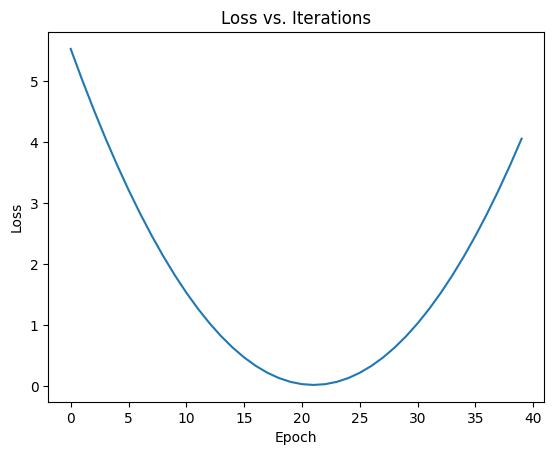

Final parameters: m = 0.49000000953674316, b = 1.2000000476837158


In [15]:
# Plot the loss values
plt.plot(range(iterations), loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()

print(f'Final parameters: m = {model.m.item()}, b = {model.b.item()}')

### What we learned:

1. We observe that when the line is further away from the points, the higher the SSR or *Loss* is.
2. More importantly, the the graph on the right forms a type of *loss landscape* that maps a certain bias to a SSR value that is the shape of a parabola.


### 6.3 Lets Make an Animation to Better Visualize that Concept:

In [16]:
from matplotlib import animation
from IPython.display import HTML
import torch

In [ ]:
# Create subplots: 2 rows, 1 column
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

def animate(i):
    axs[0].cla()
    axs[1].cla()


    ####
    # Plot first subplot
    ####

    # define m and b
    with torch.no_grad():
        m = model.m.detach().numpy()
        b = b_hist[i]

    # plot line
    x_eq = np.linspace(0, 1.05, 100)

    y_eq = m*x_eq + b

    axs[0].plot(x_eq, y_eq, color='b')

    # plot residual
    for ind in range(len(x_coords)):
        axs[0].plot([x_coords[ind], x_coords[ind]],
            [y_coords[ind], m*x_coords[ind]+b], color='g')

    # plot data points
    axs[0].scatter(x_coords, y_coords, marker='o', color='r')

    # labels
    axs[0].set_xlabel('Amount of Rain')
    axs[0].set_ylabel('Number of Banana Slugs Seen')
    axs[0].set_xlim(left=0)
    axs[0].set_ylim(bottom=-0.5, top=1.5)
    axs[0].set_title('Various y-intercepts')

    ####
    # Plot second subplot
    ####

    axs[1].plot(range(len(loss_hist[:i+1])), loss_hist[:i+1])
    axs[1].set_xlabel('Iteration')
    axs[1].set_ylabel('Loss')
    axs[1].set_title('Loss Over Iterations')

anim = animation.FuncAnimation(plt.gcf(), animate, frames=iterations + 1, interval=200)
display(HTML(anim.to_jshtml()))

# uncomment if you want to save
# anim.save('animation_loss.gif', writer='pillow', fps=30)

plt.close()

## **We now know how to quantify how "wrong" a line is!**
Now we have finished the first step!

A key insight here is that this *Loss function* does not only work on a line, it works on any *model* that takes in an input and predicts an output.

---

In more advanced models, such as neural networks, instead of using *Sum of Squared Residuals* you will often see *Mean Squared Error* which if you understand what the mean is you can see why this would be the equation:

$$MSE = \frac{SSR}{n}$$

Remember:
$$SSR = \sum_{i=1}^{n} (Observed_i - Predicted_i) ^2$$

---

# 7. Gradient Descent

Let’s say we are at iteration 15. How do we know if we should increase or decrease the y-intercept?

![](https://raw.githubusercontent.com/djlouie/Linear-Regression-Visualization/main/images/Down_Or_Up.png)

One might think we should try both directions and do which one is best, but:
* We would have to calculate it twice and then back step
* We wouldn’t know how much to increase or decrease it by. What if we overshot our correction?

---

### 7.1 Lets Use the Slope!

What if we instead calculated ths slope of the loss with respect to b?
* A positive slope tells us increasing b increases the loss
* A negative slope tells us decreasing b decreases the loss
* The slope magnitude (aka absolute value) tells us how sensitive the loss is to a change in b
* A larger slope magnitude also tells us we are further from a local minima
* Thus in order to adjust b, we can subtract the slope from it, and this can give us a more direct path to minimizing the loss!!!



![](https://raw.githubusercontent.com/djlouie/Linear-Regression-Visualization/main/images/Slope_Derivative_Gradient.png)

### 7.2 Gradient One Step Example

For this example we will reduce the number of data points: $(0.3, 0.45), (0.6, 0.6), (0.8, 0.625)$.

Let's say at the current step that $m = 0.5$ and $b = 0$. Let's plot that below to see what that looks like:


In [18]:
x_coords_sm = [0.3, 0.6, 0.8]
y_coords_sm = [0.45, 0.60, 0.625]
x_input_sm = torch.tensor(x_coords_sm)
y_obs_sm = torch.tensor(y_coords_sm)

In [19]:
# create an instance of the class
model = linear_reg(m = 0.5, b = 0)

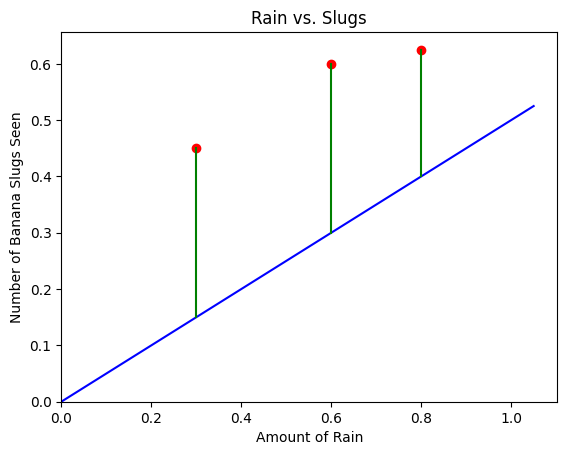

In [20]:
# get the model parameters
with torch.no_grad():
    m = model.m.detach().numpy()
    b = model.b.detach().numpy()

# plot line
x_eq = np.linspace(0, 1.05, 100)
y_eq = m*x_eq + b
plt.plot(x_eq, y_eq, color='b')

# plot residual
for i in range(len(x_coords_sm)):
    plt.plot([x_coords_sm[i], x_coords_sm[i]],
        [y_coords_sm[i], m*x_coords_sm[i]+b], color='g')

# plot data points
plt.scatter(x_coords_sm, y_coords_sm, marker='o', color='r')

# labels
plt.xlabel('Amount of Rain')
plt.ylabel('Number of Banana Slugs Seen')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Rain vs. Slugs')
plt.show()

For lines, finding the *slope* is the same as finding the *derivative*! More generally, another word for *derivative* is *gradient* which is a more broad term used in multivariate calculus that people in the machine learning community prefer.

#### 7.2.1 The Math to find the Gradient at this Specific Step by Hand:


Use the chain rule:
$$\frac{dSSR}{db} = \frac{dSSR}{dResidual} * \frac{dResidual}{d\hat{y}} * \frac{d\hat{y}}{db}$$

---
Calculate the components of the chain rule:
$$SSR = \sum_{i=1}^{n} (Residual_i) ^2$$
$$\frac{dSSR}{dResidual} = \sum_{i=1}^{n} 2(Residual_i)$$

---
Calculate the components of the chain rule:
$$Residual=y-\hat{y}$$
$$\frac{dResidual}{d\hat{y}} = 0 - 1 = -1$$

---

Calculate the components of the chain rule:
$$\hat{y}=mx+b$$
$$\frac{d\hat{y}}{db} = 0 + b = b$$

---
Simplify:
$$\frac{dSSR}{db} = \sum_{i=1}^{n} [2(Residual_i) * -1]$$

---
Plug in the points, *m*, and *b*:
$$\frac{dSSR}{db} = \sum_{i=1}^{n} [2(y_i - (mx_i + b) ) * -1] = \sum_{i=1}^{n} [-2(y_i - (mx_i + b) )]$$
$$\frac{dSSR}{db} = -2(0.45 - 0.5(0.3)) + -2(0.6 - 0.5(0.6)) + -2(0.625 - 0.5(0.8))$$
$$= -0.6 +  -0.6 + -0.45 = \textbf{-1.65}$$


#### 7.2.2

Using PyTorch `tensors` has another added benefit. It allows us to easily calculate the gradient of the *Sum of Squared Residuals* with respect to *b* simply by calling `.backward()` on our loss function.

In [21]:
# do the forward pass and get the predicted outputs
y_hat = model.forward(x_input_sm)

# calculate SSR
loss = model.ssr(y_obs_sm, y_hat)

# Find the derivative with respect to parameters
loss.backward()

# Print the derivative
print(f'The calculated gradient: {model.b.grad}')

The calculated gradient: -1.6500000953674316


As you can see, the gradient we calculated with our code is the same as the one we calculated by hand!

#### 7.2.3 Update the Parameter!

In order to update any parameter, as we said above, we must subtract the derivative of the paramter with respect to the loss. However, we do not simply subtract the entirety of the gradient, instead we subtrqact a fraction of it determined by the *learning rate*. In this specific case where we are only updating *b* here is the equation:

$$b_{new} = b_{old} - lr * \frac{dSSR}{db}$$

Now lets do that with code (Here we set learning rate to 0.1):

In [22]:
with torch.no_grad():
    # Define a learning rate
    lr = 0.1

    # store old b and m 
    old_b = model.b.detach().numpy().copy()
    m = model.m.detach().numpy()

    # update b
    model.b -= lr * model.b.grad

    # store new b
    new_b = model.b.detach().numpy().copy()

Now the class variables are updated! Lets plot the change to see if out line has got better:

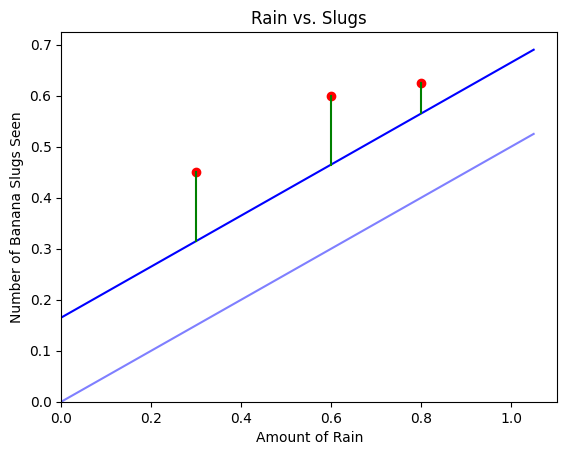

In [23]:
# plot line
x_eq = np.linspace(0, 1.05, 100)
y_eq_1 = m*x_eq + new_b
plt.plot(x_eq, y_eq_1, color='b')

# plot residual
for i in range(len(x_coords_sm)):
    plt.plot([x_coords_sm[i], x_coords_sm[i]],
        [y_coords_sm[i], m*x_coords_sm[i]+new_b], color='g')

# plot line
x_eq = np.linspace(0, 1.05, 100)
y_eq_2= m*x_eq + old_b
plt.plot(x_eq, y_eq_2, color='b', alpha=0.5)

# plot data points
plt.scatter(x_coords_sm, y_coords_sm, marker='o', color='r')

# labels
plt.xlabel('Amount of Rain')
plt.ylabel('Number of Banana Slugs Seen')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Rain vs. Slugs')
plt.show()

As we can see. the line has moved into a better position that is closer to the points and now has less loss!

![](https://raw.githubusercontent.com/djlouie/Linear-Regression-Visualization/main/images/Update_Step.png)


## 8. Linear Regression in Action!

Every time we update the line on the entire data set we call that one *epoch*. So to do *linear regression*, all we have to do is update the line for many epochs!!!

Lets do an example where we use *linear regression* to update $b$ of a perfectly flat line with $m=0$.

In [ ]:
epochs = 50
loss_hist = []
b_hist = []
step_size = 0.01  # aka learning rate

# create an instance of the class
model = linear_reg(m = 0.0, b = 0.0)


for i in range(epochs):

    # do the forward pass and get the predicted outputs
    y_hat = model.forward(x_input)

    # calculate SSR
    loss = model.ssr(y_observed, y_hat)

    # storing the calculated SSR in a list
    loss_hist.append(loss.item())

    # store y-intercept
    b_hist.append(model.b.item())

    # backward pass on the SSR, calculates the gradient
    loss.backward()

    # Update the parameters
    with torch.no_grad():
        model.b -= step_size * model.b.grad

    # Zero Out Gradients after one iteration
    model.b.grad.zero_()

    # priting the values for understanding
    print(f'{i},\t{loss.item()},\t{model.b.item()}')

b_hist.append(model.b.item())

0,	1.5556249618530273,	0.05249999836087227
1,	1.2937812805175781,	0.09974999725818634
2,	1.0816879272460938,	0.14227500557899475
3,	0.9098921418190002,	0.18054750561714172
4,	0.7707376480102539,	0.21499276161193848
5,	0.658022403717041,	0.2459934800863266
6,	0.5667231678962708,	0.27389413118362427
7,	0.492770791053772,	0.2990047335624695
8,	0.4328693151473999,	0.32160425186157227
9,	0.38434913754463196,	0.3419438302516937
10,	0.34504783153533936,	0.36024945974349976
11,	0.3132137060165405,	0.376724511384964
12,	0.2874281108379364,	0.39155206084251404
13,	0.2665417492389679,	0.4048968553543091
14,	0.2496238350868225,	0.4169071614742279
15,	0.23592031002044678,	0.4277164340019226
16,	0.22482046484947205,	0.4374447762966156
17,	0.21582961082458496,	0.44620031118392944
18,	0.2085469663143158,	0.4540802836418152
19,	0.20264802873134613,	0.4611722528934479
20,	0.19786988198757172,	0.4675550162792206
21,	0.19399961829185486,	0.473299503326416
22,	0.1908647119998932,	0.4784695506095886
23,	0.1

#### Let's plot the loss over epochs so we can see that the *model* has "learned' to decrease the loss:

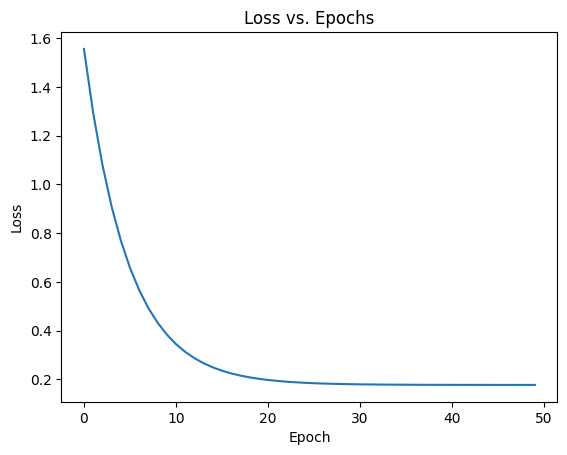

Final parameters: m = 0.0, b = 0.5222943425178528


In [25]:
# Plot the loss values
plt.plot(range(epochs), loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

print(f'Final parameters: m = {model.m.item()}, b = {model.b.item()}')

#### Here is the final result, as we can expect the line is somewhere in the middle:

tensor(0., requires_grad=True) tensor(0.5223, requires_grad=True)


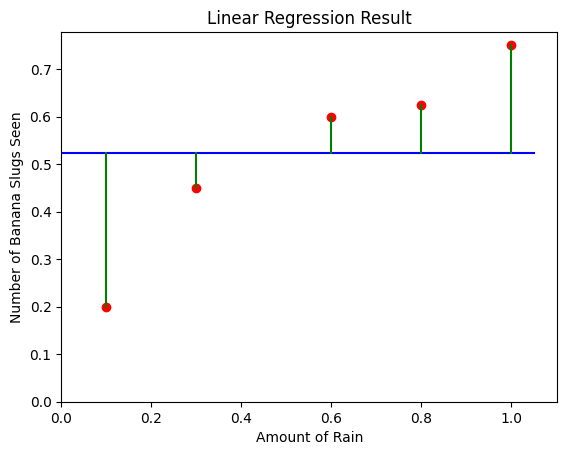

In [42]:
with torch.no_grad():
    # plot line
    x_eq = np.linspace(0, 1.05, 100)

    print(model.m, model.b)

    y_eq = model.m*x_eq + model.b
    plt.plot(x_eq, y_eq, color='b')

    # plot residual
    for i in range(len(x_coords)):
        plt.plot([x_coords[i], x_coords[i]],
            [y_coords[i], model.m*x_coords[i]+model.b], color='g')

    # plot data points
    plt.scatter(x_coords, y_coords, marker='o', color='r')

# labels
plt.xlabel('Amount of Rain')
plt.ylabel('Number of Banana Slugs Seen')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Linear Regression Result')
plt.show()

#### Let's create an animation for this:

In [ ]:
def animate(i):
    plt.cla()

    # define m and b
    with torch.no_grad():
        m = model.m.detach().numpy()
        b = b_hist[i]

    # plot line
    x_eq = np.linspace(0, 1.05, 100)

    y_eq = m*x_eq + b
    plt.plot(x_eq, y_eq, color='b')

    # plot residual
    for i in range(len(x_coords)):
        plt.plot([x_coords[i], x_coords[i]],
            [y_coords[i], m*x_coords[i]+b], color='g')

    # plot data points
    plt.scatter(x_coords, y_coords, marker='o', color='r')

    # labels
    plt.xlabel('Amount of Rain')
    plt.ylabel('Number of Banana Slugs Seen')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.title('Linear Regression Result')

anim = animation.FuncAnimation(plt.gcf(), animate, frames=epochs + 1, interval=50)
display(HTML(anim.to_jshtml()))

# uncomment if you want to save
# anim.save('animation.gif', writer='pillow', fps=30)

plt.close()

## 9. Linear Regression for all Parameters!

Now that you learned how to use *linear regression* to optimize one parameter, $b$. It is very simple to go from only optimizing the $b$ to optimizing the $m$ and $b$ simultaneously!

Every iteration/step:
* Calculate:
    * $\frac{SSR}{b}$ and $\frac{SSR}{m}$
* Update:
    * $b_{new} = b_{old} - lr * \frac{dSSR}{db}$
    * $m_{new} = m_{old} - lr * \frac{dSSR}{dm}$

### 9.1 Let's Do that with Code:

In [28]:
epochs = 100
loss_hist = []
b_hist = []
m_hist = []
step_size = 0.02  # aka learning rate

# create an instance of the class
model = linear_reg(m = 0.0, b = 0.0)


for i in range(epochs):

    # do the forward pass and get the predicted outputs
    y_hat = model.forward(x_input)

    # calculate SSR
    loss = model.ssr(y_observed, y_hat)

    # storing the calculated SSR in a list
    loss_hist.append(loss.item())

    # store y-intercept
    b_hist.append(model.b.item())
    m_hist.append(model.m.item())

    # backward pass on the SSR, calculates the gradient
    loss.backward()

    # Update m AND b
    with torch.no_grad():
        model.m -= step_size * model.m.grad
        model.b -= step_size * model.b.grad

    # Zero Out Gradients after one iteration
    model.b.grad.zero_()
    model.m.grad.zero_()

    # priting the values for understanding
    if i%2 == 0:
        print(f'{i},\t{loss.item()},\t{model.m.item()},\t{model.b.item()}')

b_hist.append(model.b.item())
m_hist.append(model.m.item())

0,	1.5556249618530273,	0.0705999955534935,	0.10499999672174454
2,	0.49016016721725464,	0.1634524017572403,	0.23604115843772888
4,	0.1823669821023941,	0.21734043955802917,	0.30370578169822693
6,	0.09208643436431885,	0.2502268850803375,	0.3375030755996704
8,	0.06433434039354324,	0.2717374265193939,	0.3532367944717407
10,	0.05463685840368271,	0.287031888961792,	0.3593696057796478
12,	0.05022696405649185,	0.2988779842853546,	0.3604320287704468
14,	0.047435034066438675,	0.30876192450523376,	0.35884860157966614
16,	0.04520195722579956,	0.31748342514038086,	0.35591572523117065
18,	0.04321799427270889,	0.3254743218421936,	0.3523257076740265
20,	0.041388798505067825,	0.3329693377017975,	0.3484472632408142
22,	0.03968210145831108,	0.34009748697280884,	0.3444759249687195
24,	0.03808385506272316,	0.3469310998916626,	0.34051448106765747
26,	0.036585427820682526,	0.3535119593143463,	0.3366160988807678
28,	0.03518010675907135,	0.3598654568195343,	0.3328074514865875
30,	0.03386198356747627,	0.36600810

### 9.2 Plot the Loss

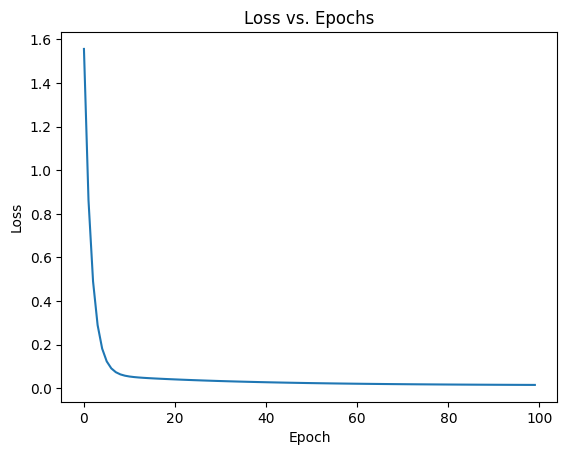

Final parameters: m = 0.4920213520526886, b = 0.2524847984313965


In [29]:
# Plot the loss values
plt.plot(range(epochs), loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

print(f'Final parameters: m = {model.m.item()}, b = {model.b.item()}')

### 9.3 Create the Animation

In [ ]:
def animate(i):
    plt.cla()

    # define m and b
    with torch.no_grad():
        m = m_hist[i]
        b = b_hist[i]

    # plot line
    x_eq = np.linspace(0, 1.05, 100)

    y_eq = m*x_eq + b
    plt.plot(x_eq, y_eq, color='b')

    # plot residual
    for i in range(len(x_coords)):
        plt.plot([x_coords[i], x_coords[i]],
            [y_coords[i], m*x_coords[i]+b], color='g')

    # plot data points
    plt.scatter(x_coords, y_coords, marker='o', color='r')

    # labels
    plt.xlabel('Amount of Rain')
    plt.ylabel('Number of Banana Slugs Seen')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.title('Linear Regression Result')

anim = animation.FuncAnimation(plt.gcf(), animate, frames=epochs + 1, interval=50)
display(HTML(anim.to_jshtml()))

# uncomment if you want to save
# anim.save('animation.gif', writer='pillow', fps=30)

plt.close()

## 10 Multiple Input Variables

What if we want to use additional data to predict the number of banana slugs, such as the temperature? Is that possible?

Yes!
* Using 1 feature to predict 1 output is fitting/optimizing a 2D line.
    * $\hat{y} = mx + b$
* Using 2 features to predict 1 output is fitting/optimizing a 3D plane.
    * $\hat{y} = m_1x + m_2y + b$
* Using 3 features to predict 1 output is fitting/optimizing a 3+D hyperplane!
    * $\hat{y} = m_1x + m_2y + m_3z + \cdots + b$

Another way you may see this written is instead of $m$ for *slope*, we replace it with $w$ for *weight*. Then instead of calling $b$ the *y-intercept* we will call it the *bias*. Then for any linear regression model with $n$ features the equation is:
$$\hat{y} = \sum^{n}_{i=1} w_ix_i + b$$


### 10.1 3D Linear Regression Model with 2 Input Features

In [31]:
class linear_reg_3D:
    def __init__(self, m1, m2, b):
        self.m1 = torch.tensor(m, requires_grad=True, dtype=dtype)
        self.m2 = torch.tensor(m, requires_grad=True, dtype=dtype)
        self.b = torch.tensor(b, requires_grad=True, dtype=dtype)
    def forward(self, x, y):
        return self.m1*x + self.m2*y + self.b
    def ssr(self, y, y_hat):
        return torch.sum( (y-y_hat)**2 )

### 10.2 The Data

In [35]:
x_values = torch.tensor([0.088, 0.472, 0.941, 0.452, 0.092, 0.8, 0.988, 0.12, 0.247, 0.507])
y_values = torch.tensor([0.489, 0.563, 0.925, 0.442, 0.535, 0.714, 0.865, 0.027, 0.932, 0.233])
z_values = torch.tensor([0.18275, 0.37985, 0.49835, 0.4223, 0.16445, 0.5087, 0.55355, 0.40985, 0.0788, 0.54935])

### 10.3 Train the Linear Regression Model

In [36]:
epochs = 120
loss_hist = []
b_hist = []
m1_hist = []
m2_hist = []
step_size = 0.02  # aka learning rate

# create an instance of the class
model = linear_reg_3D(m1 = 0.0, m2 = 0.0, b = 0.0)


for i in range(epochs):

    # do the forward pass and get the predicted outputs
    y_hat = model.forward(x_values, y_values)

    # calculate SSR
    loss = model.ssr(z_values, y_hat)

    # storing the calculated SSR in a list
    loss_hist.append(loss.item())

    # store y-intercept
    b_hist.append(model.b.item())
    m1_hist.append(model.m1.item())
    m2_hist.append(model.m2.item())

    # backward pass on the SSR, calculates the gradient
    loss.backward()

    # Update m AND b
    with torch.no_grad():
        model.m1 -= step_size * model.m1.grad
        model.m2 -= step_size * model.m2.grad
        model.b -= step_size * model.b.grad

    # Zero Out Gradients after one iteration
    model.b.grad.zero_()
    model.m1.grad.zero_()
    model.m2.grad.zero_()

    # priting the values for understanding
    if i%2 == 0:
        print(f'{i},\t{loss.item()},\t{model.m1.item()},\t{model.m2.item()},\t{model.b.item()}')

b_hist.append(model.b.item())
m1_hist.append(model.m1.item())
m2_hist.append(model.m2.item())

0,	0.8487340211868286,	0.4571950435638428,	0.4381236433982849,	-0.05872200056910515
2,	0.4707452654838562,	0.42983606457710266,	0.3830816149711609,	-0.06857767701148987
4,	0.42282921075820923,	0.41986334323883057,	0.34853947162628174,	-0.049444716423749924
6,	0.3849089741706848,	0.41315317153930664,	0.3178780972957611,	-0.027876978740096092
8,	0.3511068820953369,	0.40779200196266174,	0.2888873517513275,	-0.007208619266748428
10,	0.320843368768692,	0.40344828367233276,	0.26121944189071655,	0.012214032001793385
12,	0.29369115829467773,	0.4000011384487152,	0.2347705364227295,	0.030423840507864952
14,	0.26927971839904785,	0.39736321568489075,	0.20947198569774628,	0.04749707132577896
16,	0.24728736281394958,	0.39545711874961853,	0.1852630376815796,	0.06351042538881302
18,	0.2274337112903595,	0.39421218633651733,	0.16208714246749878,	0.07853591442108154
20,	0.2094745635986328,	0.39356350898742676,	0.13989126682281494,	0.09264049679040909
22,	0.1931968331336975,	0.3934514820575714,	0.11862557

### 10.4 Plot the Loss

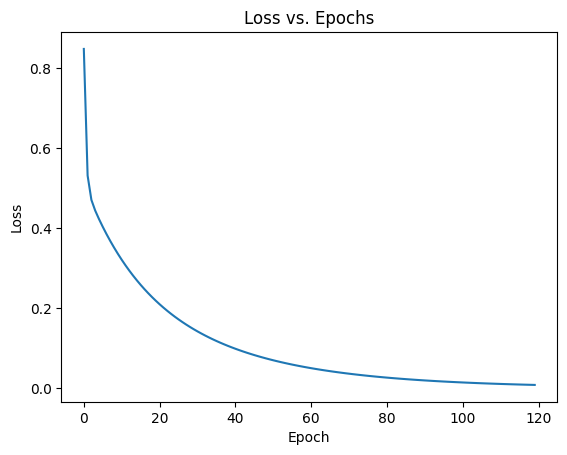

Final parameters: m1 = 0.5276222825050354, m2 = 0.5276222825050354, b = 0.31879156827926636


In [37]:
# Plot the loss values
plt.plot(range(epochs), loss_hist)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

print(f'Final parameters: m1 = {model.m1.item()}, m2 = {model.m1.item()}, b = {model.b.item()}')

### 10.5 Plot the Final Result

In [38]:
from matplotlib import cm

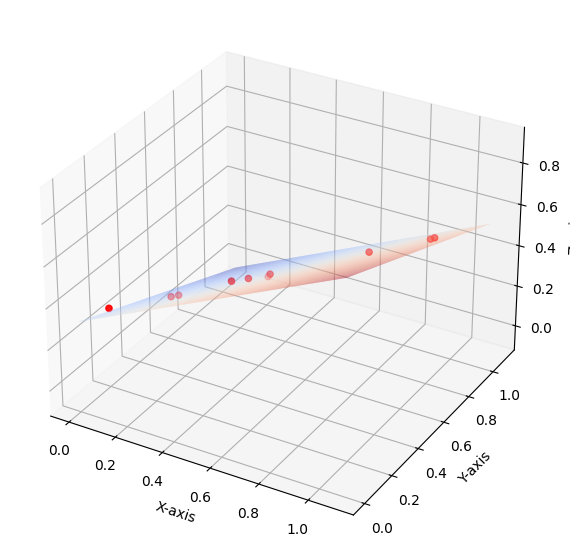

In [39]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

with torch.no_grad():
    # Plotting 3D points
    ax.scatter(x_values, y_values, z_values, c='red')

    # plot model
    x = np.linspace(0, 1.1, 100)
    y = np.linspace(0, 1.1, 100)
    x, y = np.meshgrid(x, y)
    z = model.m1 * x + model.m2 * y + model.b

    # Plot the decision boundary
    ax.plot_surface(x, y, z, alpha=0.5, color='blue', cmap=cm.coolwarm)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()

### 10.6 Create the Animation

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def animate(i):
    plt.cla()

    # define m and b
    with torch.no_grad():
        m1 = m1_hist[i]
        m2 = m2_hist[i]
        b = b_hist[i]

    # Plotting 3D points
    ax.scatter(x_values, y_values, z_values, c='red')

    # plot model
    x = np.linspace(0, 1.1, 100)
    y = np.linspace(0, 1.1, 100)
    x, y = np.meshgrid(x, y)
    z = m1 * x + m2 * y + b

    # Plot the decision boundary
    ax.plot_surface(x, y, z, alpha=0.5, color='blue', cmap=cm.coolwarm)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)

anim = animation.FuncAnimation(plt.gcf(), animate, frames=epochs + 1, interval=50)
display(HTML(anim.to_jshtml()))

# uncomment if you want to save
# anim.save('3DLinearReg.gif', writer='pillow', fps=30)

plt.close()

## 11. CONGRATULATIONS! You now understand how Linear Regression works 🥳

* Linear as in:
    * Not bendy (aka straight) 😅
* Regression as in:
    * It is a type of Supervised Learning (Uses Labeled Data):
        * **It is a Regression Problem/Mode**l
            * The model predicts a continuous value from an input
        * It is not a Classification Problem/Model
            * The model predicts a predetermined label/category from an input
